<a href="https://colab.research.google.com/github/melody016861/melody_Portfolio.github.io/blob/main/Python%E6%95%B8%E6%93%9A%E5%88%86%E6%9E%90_HW_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 上課內容

## 6-2 線性回歸的基本概念
UML: https://moocs.nccu.edu.tw/mod/page/view.php?id=2509&forceview=1

## 6-3 模擬線性迴歸的數據
UML: https://moocs.nccu.edu.tw/mod/page/view.php?id=2510&forceview=1

數據分析!

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 準備模擬資料

做一條直線
我們來假設一條線，比如說
$$f(x)=1.2x+0.8$$

準備好50個點

In [ ]:
x = np.linspace(0,5,50)

畫出圖形來。

In [ ]:
y = 1.2*x+0.8

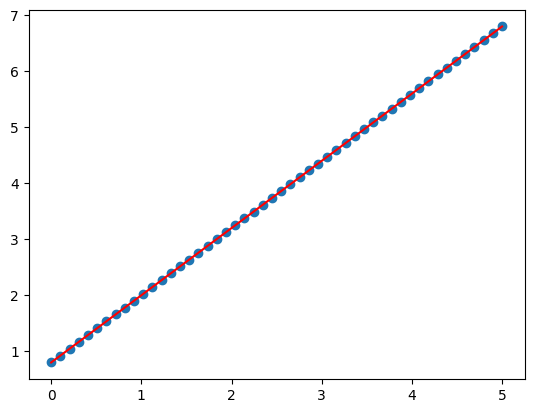

In [ ]:
plt.scatter(x,y) # 我們觀察到的資料
plt.plot(x,y,"r") # 真實世界的函數

**加入noise項，看來更真實。**

大概的想法就是，我們真實世界的問題，化成函數，我們假設背後有個美好的函數。但相信我們很少看到真實世界的資料那麼漂亮。在統計上，我們就是假設

$$f(x)+ε(x)$$

也就是都有noise項。

In [ ]:
y=1.2*x + 0.8 + 0.6*np.random.randn(50) # 此是加上一些偏差後的函數

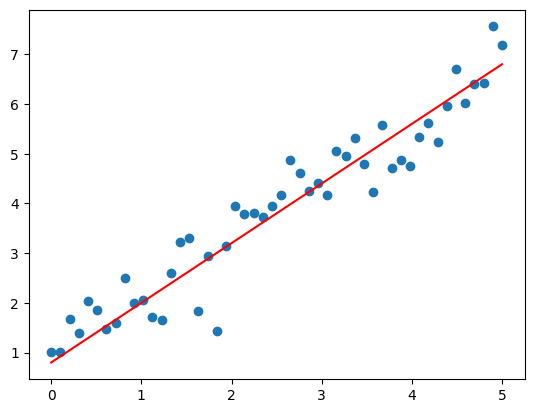

In [ ]:
plt.scatter(x,y)
plt.plot(x,1.2*x+0.8,"r")

**做線性迴歸找出那條線**

做線性迴歸有很多套件，但我們這裡用sklearn裡的LinearRegression來做線性迴歸。

In [ ]:
x

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

In [ ]:
y

array([1.00279628, 1.01022759, 1.67363833, 1.39462102, 2.03350865,
       1.84622912, 1.48117087, 1.60305368, 2.50469158, 2.00415436,
       2.05662358, 1.70894569, 1.6565858 , 2.5934162 , 3.23051516,
       3.29911303, 1.84207193, 2.93741775, 1.42975285, 3.15044481,
       3.95595778, 3.77976068, 3.80176157, 3.73196462, 3.95176602,
       4.16053518, 4.86712541, 4.61799796, 4.24769716, 4.40500158,
       4.16270947, 5.05066232, 4.95511245, 5.31597119, 4.79336439,
       4.23715299, 5.57621066, 4.71499646, 4.87867514, 4.74475852,
       5.33788987, 5.62447551, 5.23712616, 5.95111512, 6.70583362,
       6.02108759, 6.39626695, 6.41382027, 7.55914155, 7.18653416])

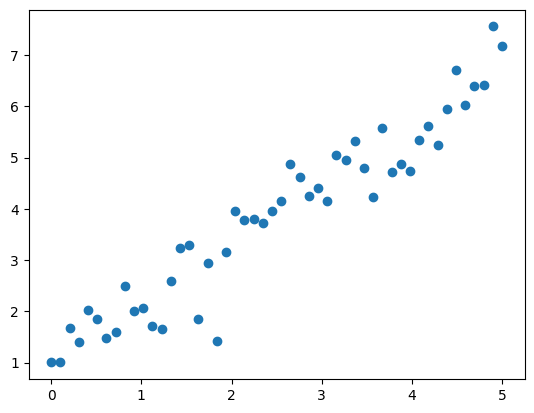

In [ ]:
plt.scatter(x,y)

這裡要注意我們本來的x是

$$[ x_{1}, x_{2}, ..., x_{50} ]$$

但現在要的是

$$[[x_{1}], [x_{2}], ..., [x_{50}]]$$

這樣的。

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# 開線性迴歸機的方法:
# 機器的變數名稱 = LinearRegression()

regr = LinearRegression()

In [ ]:
# 改變array形狀的方法:
# array的變數名.reshape(新的形狀)

X = x.reshape(50, 1)

In [ ]:
X

array([[0.        ],
       [0.10204082],
       [0.20408163],
       [0.30612245],
       [0.40816327],
       [0.51020408],
       [0.6122449 ],
       [0.71428571],
       [0.81632653],
       [0.91836735],
       [1.02040816],
       [1.12244898],
       [1.2244898 ],
       [1.32653061],
       [1.42857143],
       [1.53061224],
       [1.63265306],
       [1.73469388],
       [1.83673469],
       [1.93877551],
       [2.04081633],
       [2.14285714],
       [2.24489796],
       [2.34693878],
       [2.44897959],
       [2.55102041],
       [2.65306122],
       [2.75510204],
       [2.85714286],
       [2.95918367],
       [3.06122449],
       [3.16326531],
       [3.26530612],
       [3.36734694],
       [3.46938776],
       [3.57142857],
       [3.67346939],
       [3.7755102 ],
       [3.87755102],
       [3.97959184],
       [4.08163265],
       [4.18367347],
       [4.28571429],
       [4.3877551 ],
       [4.48979592],
       [4.59183673],
       [4.69387755],
       [4.795

In [ ]:
# 開始讓線性迴歸機學習的方法:
# 機器的變數名稱.fit(輸入資料, 正確答案)

regr.fit(X,y)

LinearRegression()

In [ ]:
# 開始預測的方法:
# 機器的變數名稱.predict(輸入資料)

Y = regr.predict(X)

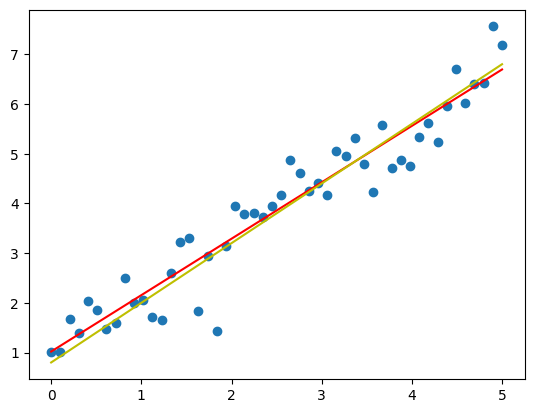

In [ ]:
plt.scatter(x,y) # 正確答案
plt.plot(x,Y,"r") # 用線性迴歸機學習出來的
plt.plot(x,1.2*x+0.8,"y") # 完美世界的答案

## 6-5 過度擬合overfitting
UML: https://moocs.nccu.edu.tw/mod/page/view.php?id=2512&forceview=1

指的是將過去的資料學得太像，甚至是一模一樣，可是有點像是將答案背下來而已。而未來還沒發生，所以可能預測的答案是偏向將過去的答案背下來以套用在未來還未發生的狀況，不見得準確。

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from ipywidgets import interact

In [ ]:
x = np.linspace(0,5,50)
y = 1.2*x + 0.8 + 0.6*np.random.randn(50)

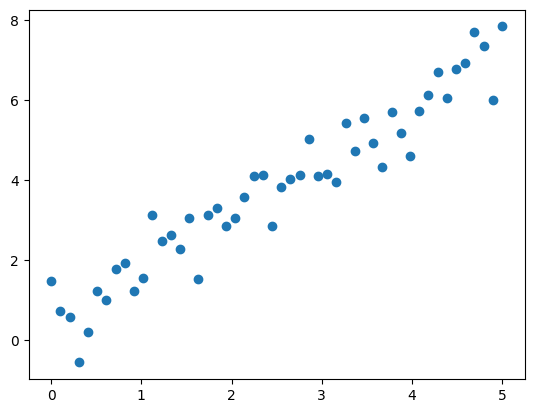

In [ ]:
plt.scatter(x,y)

In [ ]:
X = np.linspace(0,5,1000)

def my_fit(n):
  Y = 4 * np.sin(X) + 4
  plt.scatter(x,y)
  plt.plot(X,Y,"r")
  plt.show()

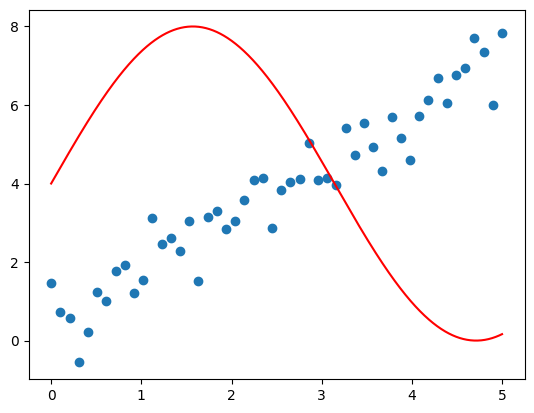

In [ ]:
my_fit(5)

In [ ]:
interact(my_fit,n=(1,500))

interactive(children=(IntSlider(value=250, description='n', max=500, min=1), Output()), _dom_classes=('widget-…

<function __main__.my_fit(n)>

## 6-6 訓練資料和測試資料
UML: https://moocs.nccu.edu.tw/mod/page/view.php?id=2513&forceview=1

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(0,5,100)
y = 1.2*x+0.8+0.5*np.random.randn(100)

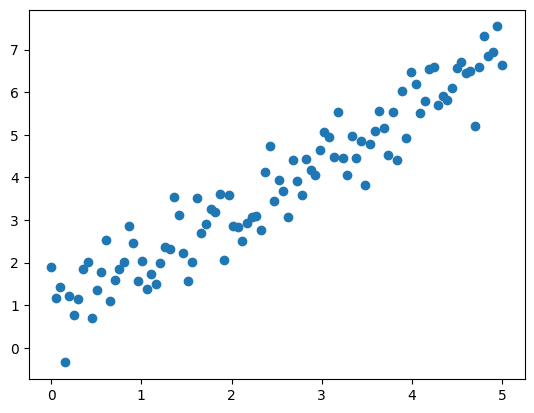

In [ ]:
plt.scatter(x,y)

### 標準函數訓練及測試

##### 分訓練資料、測試資料(Training data, Testing data)
一般我們想要看算出來的逼近函數在預測上是不是可靠，會把一些資料留給「測試」，就是不讓電腦在計算時「看到」這些測試資料。等函數學成了以後，再來測試準不準確。這是我麼可以用

    sklearn.model_selection

裡的

    train_test_split

來亂數選一定百分比的資料來用。




In [ ]:
from sklearn.model_selection import train_test_split

把原來的x, y中的 80% 給 training data, 20%給 testing data。

#### 分割 Training 和 Testing Data 的方法

輸入的訓練資料，輸入的測試資料，輸出的訓練資料，輸出的測試資料 = train_test_split(x, y, test_size = 分割給test的比例, random_state = 隨便給一個數字)

In [ ]:
# y_train: 為 x_train 的正確答案。
# y_test: 為 x_test 的正確答案。
x_train, x_test, y_train, y_test = train_test_split(x,y,
                              test_size=0.2,
                              random_state=87)

In [ ]:
len(x_train)

80

In [ ]:
len(x_test)

20

In [ ]:
x_train = x_train.reshape(80,1)

In [ ]:
x_train

array([[3.38383838],
       [2.72727273],
       [1.86868687],
       [3.83838384],
       [1.41414141],
       [0.05050505],
       [4.19191919],
       [4.54545455],
       [2.82828283],
       [0.1010101 ],
       [0.60606061],
       [4.94949495],
       [1.36363636],
       [0.25252525],
       [3.58585859],
       [0.85858586],
       [1.21212121],
       [3.33333333],
       [2.62626263],
       [3.43434343],
       [3.48484848],
       [2.77777778],
       [3.68686869],
       [0.2020202 ],
       [4.74747475],
       [4.34343434],
       [0.65656566],
       [1.71717172],
       [1.11111111],
       [1.51515152],
       [4.7979798 ],
       [2.17171717],
       [2.47474747],
       [1.91919192],
       [0.90909091],
       [2.52525253],
       [3.18181818],
       [1.06060606],
       [2.27272727],
       [4.6969697 ],
       [2.42424242],
       [2.67676768],
       [4.14141414],
       [3.23232323],
       [1.56565657],
       [1.81818182],
       [3.93939394],
       [2.373

另一種改變array形狀的方法:

array的變數名稱.shape = 新的形狀

In [ ]:
x_test.shape = (20,1)

In [ ]:
x_test

array([[0.80808081],
       [4.09090909],
       [4.29292929],
       [1.61616162],
       [1.96969697],
       [1.26262626],
       [1.31313131],
       [1.46464646],
       [3.28282828],
       [0.35353535],
       [4.24242424],
       [5.        ],
       [2.92929293],
       [3.53535354],
       [4.64646465],
       [3.73737374],
       [0.15151515],
       [0.        ],
       [2.22222222],
       [1.66666667]])

我們在「訓練」這個函數時只有以下這些資料。

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regr = LinearRegression()

In [ ]:
regr.fit(x_train,y_train)

LinearRegression()

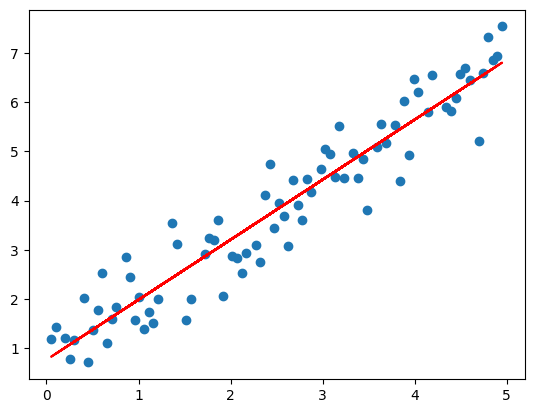

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regr.predict(x_train), "r")

**用訓練資料來fit函數**

記得現在我們只用 80% 的資料去訓練。

**用測試資料事是我們預測準不準**

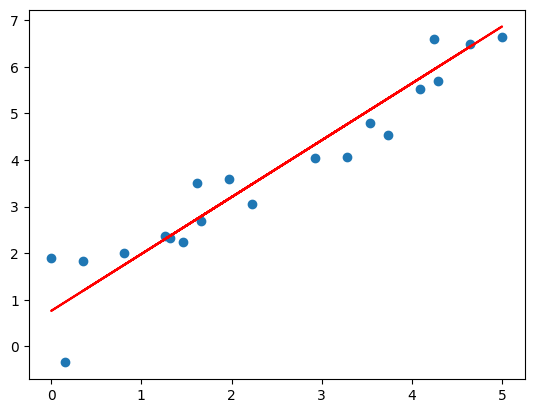

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test, regr.predict(x_test),"r")

## 6-7 用線性回歸預測波士頓房價

UML: https://moocs.nccu.edu.tw/mod/page/view.php?id=2514&forceview=1

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

**scikit-learn 套件**

讀入我們學過的 LinearRegression 做線性回歸，還有train_test_split 分訓練、測試資料。

### scikit-learn 真實世界數據

scikit-learn 內建一些真實世界的數據，可以讓你玩玩，他們稱作"Toy Datasets"。有哪些可以參考[scikit-learn 官網](https://scikit-learn.org/stable/)的說明。

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**讀入 boston 房價數據**

In [ ]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [ ]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
boston = load_boston()

NameError: name 'load_boston' is not defined

### 資料裡到底有甚麼

**features**

你可以用 feature_names 看到數據中所有的features。你才發現原來有13個 features!

In [ ]:
boston.feature_names

In [ ]:
X = boston.data
Y = boston.target

NameError: name 'boston' is not defined

In [ ]:
len(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=87)

NameError: name 'Y' is not defined

In [ ]:
regr = LinearRegression

In [ ]:
regr.fit(x_train,y_train)

In [ ]:
y_predict = regr.predict(x_test)

In [ ]:
plt.scatter(y_test,y_predict)
plt.plot([0,50],[0,50],"r")
plt.xlabel('True Price')
plt.Ylabel('Predict Price')

**解釋數據內容**

你也可以用

```
print(boston.DESCR)
```

看看完整的解釋。




In [ ]:
print(boston.DESCR)

## 6-8 畫出各feature和輸出關係

UML: https://moocs.nccu.edu.tw/mod/page/view.php?id=2515&forceview=1

In [ ]:
plt.figure(figsize=(8,10))
for i,feature in enumerate(boston.feature_names):
  plt.subplot(5,3,i+1)
  plt.scatter(X[:,i],Y,s=1)
  plt.ylabel("price")
  plt.xlabel(feature)
  plt.tight_layout()

NameError: name 'boston' is not defined

<Figure size 800x1000 with 0 Axes>

**[小技巧] 善用 enumerate**

In [ ]:
L = ['a','b','c']

In [ ]:
for i in L:
  print(i)

a
b
c


In [ ]:
 for i in range(3):
  print(i+1, L[i])

1 a
2 b
3 c


In [ ]:
list(enumerate(L))

[(0, 'a'), (1, 'b'), (2, 'c')]

很高級的 enumerate 用法:

enumerate(list變數)

enumerate會把list的index和list的item包成一個tuple，然後再把每個tuple包成按index順序的tuple。

In [ ]:
for i in enumerate(L):
  print(i)

(0, 'a')
(1, 'b')
(2, 'c')


In [ ]:
for i,s in enumerate(L):
  print(i+1,s)

1 a
2 b
3 c


**[小技巧]畫多個圖**

In [ ]:
x = np.linspace(-10,10,200)

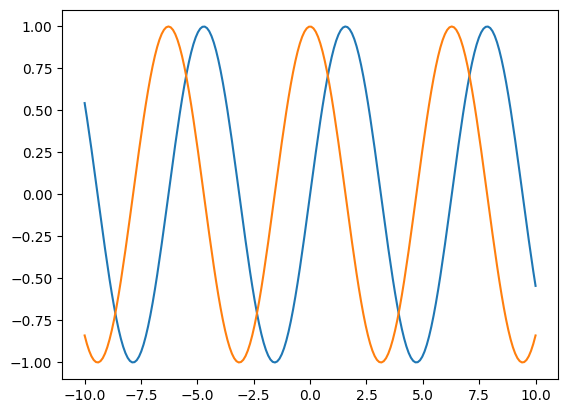

In [ ]:
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))

畫很多圖的方法:

plt.subplot(2,2,1) plt.圖一

plt.subplot(2,2,2) plt.圖二

plt.subplot(2,2,3) plt.圖三

plt.subplot(2,2,4) plt.圖四

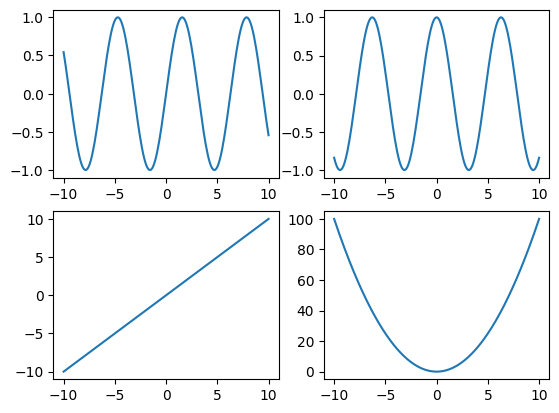

In [ ]:
plt.subplot(2,2,1)
plt.plot(x,np.sin(x))

plt.subplot(2,2,2)
plt.plot(x,np.cos(x))

plt.subplot(2,2,3)
plt.plot(x,x)

plt.subplot(2,2,4)
plt.plot(x,x**2)

**炫炫的畫出個別參數和target關係**

In [ ]:
plt.figure(figsize=(8,10))
for i,feature in enumerate(boston.feature_names):
  plt.subplot(5,3,i+1)
  plt.scatter(X[:,i],Y,s=1)
  plt.ylabel("price")
  plt.xlabel(feature)
  plt.tight_layout()

# 作業

## 第一題
利用一組你喜歡的數據集（如房價數據集），試著預測房價的趨勢。

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## 第二題
試著使用不同的特徵變量，來看看對結果的影響。

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38364 (\N{CJK UNIFIED IDEOGRAPH-95DC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29105 (\N{CJK UNIFIED IDEOGRAPH-71B1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


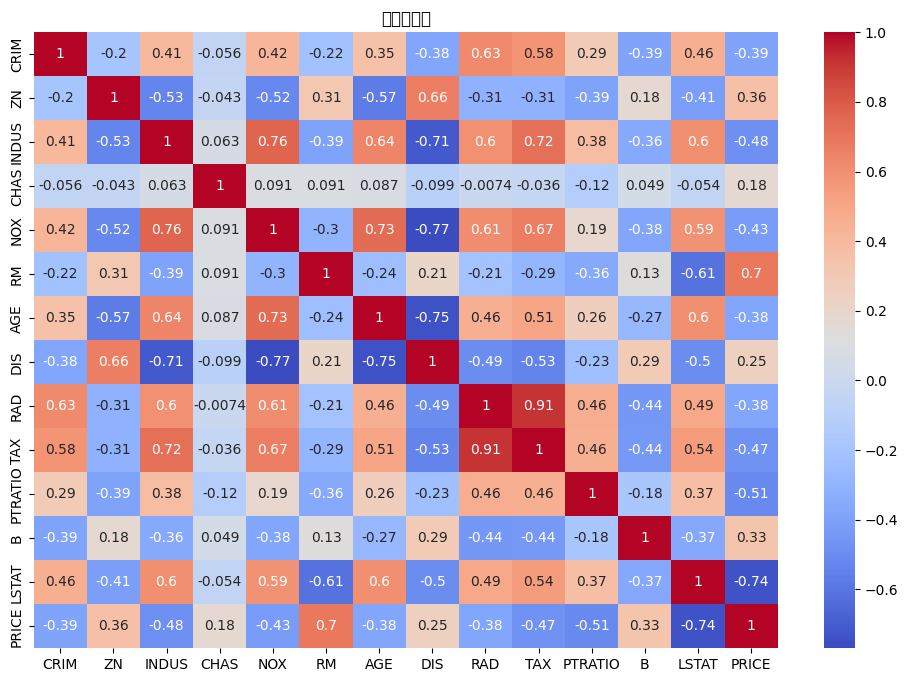

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already fetched the data and target values using the provided code snippet
# Alternatively, you can fetch the Boston housing dataset from its original source as described earlier

# Define feature names
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# 加載數據集
df = pd.DataFrame(data, columns=feature_names)
df['PRICE'] = target

# 假設你已經加載了數據集，並將其存在名為df的DataFrame中

# 查看數據集前幾行
print(df.head())

# 查看數據集的基本信息
print(df.info())

# 查看特徵之間的相關性
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('相關性熱圖')
plt.show()


In [ ]:
# 分割數據集
X = df.drop('PRICE', axis=1)
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定義評估函数
def evaluate_model(model, X_train, y_train, cv=5):
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    return np.sqrt(-scores.mean())

## 第三題
利用不同的模型評估方法（如交叉驗證），來比較不同的線性迴歸模型的效果。

In [ ]:
# 初始化線性回歸模型
models = {
    '線性回歸': LinearRegression(),
    '嶺回歸 ridge regression': Ridge(),
    'LASSO回歸': Lasso()
}

# 評估不同模型的性能
for name, model in models.items():
    score = evaluate_model(model, X_train, y_train)
    print(f'{name}: RMSE = {score:.2f}')


線性回歸: RMSE = 4.86
嶺回歸 ridge regression: RMSE = 4.90
LASSO回歸: RMSE = 5.30


## 第四題
利用特徵選擇的方法（如 L1 正規化），對模型進行特徵選擇。

In [ ]:
# 使用Lasso回歸進行特徵選擇
selector = SelectFromModel(Lasso(alpha=0.1))
selector.fit(X_train, y_train)

# 獲取所選特徵
selected_features = X_train.columns[selector.get_support()]

# 重新訓練模型
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

model = LinearRegression()
model.fit(X_train_selected, y_train)

# 評估模型
score = evaluate_model(model, X_train_selected, y_train)
print(f'特徵選擇後的線性回歸: RMSE = {score:.2f}')


特徵選擇後的線性回歸: RMSE = 4.98


## 第五題
利用非線性轉換（如多項式變換），對模型進行變換，看看對結果的影響。

In [ ]:
# 應用多項式變換
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 構建模型
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 評估模型
score = evaluate_model(model, X_train_poly, y_train)
print(f'多項式轉換後的線性回歸: RMSE = {score:.2f}')


多項式轉換後的線性回歸: RMSE = 5.50
